In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import networkx as nx
import statsmodels.api as sm
import powerlaw
from collections import Counter
from scipy.stats import ttest_rel
from pypinyin import lazy_pinyin

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
location_zscore=pd.read_csv('./siteexample1/location/zscore_category.csv',index_col=0)
zscore_category=pd.read_csv('./siteexample1/zscore_category.csv',index_col=0)
names=['median','pertentile_10']
for n in names:
    diction=dict(location_zscore[['user_id',n]].values)
    zscore_category['loc_'+n]=zscore_category['user_id'].apply(lambda x: diction[x]
                                                              if x in diction
                                                              else np.nan)

In [4]:
zscore_category=zscore_category[~zscore_category.isin([np.nan, np.inf, -np.inf]).any(1)]

In [5]:
zscore_category=zscore_category[(zscore_category['loc_median'].astype('str')!='nan')&(zscore_category['loc_pertentile_10'].astype('str')!='nan')]

In [6]:
median=zscore_category['median'].median()
loc_median=zscore_category['loc_median'].median()

In [7]:
print(median,loc_median)

14.93116367035 2.84604989415


In [8]:
high_low=zscore_category[(zscore_category['median']>median)&(zscore_category['loc_median']<=loc_median)].index
zscore_category.ix[high_low,'category11']='high_low'

low_low=zscore_category[(zscore_category['median']<=median)&(zscore_category['loc_median']<=loc_median)].index
zscore_category.ix[low_low,'category11']='low_low'

low_high=zscore_category[(zscore_category['median']<=median)&(zscore_category['loc_median']>loc_median)].index
zscore_category.ix[low_high,'category11']='low_high'

high_high=zscore_category[(zscore_category['median']>median)&(zscore_category['loc_median']>loc_median)].index
zscore_category.ix[high_high,'category11']='high_high'

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [9]:
highest_fees=zscore_category.sort_values(by=['fees'],ascending=False)[:int(len(zscore_category)*0.05)]
print(len(highest_fees[highest_fees.category11=='low_high'])/len(zscore_category[zscore_category.category11=='low_high']))
print(len(highest_fees[highest_fees.category11=='low_low'])/len(zscore_category[zscore_category.category11=='low_low']))
print(len(highest_fees[highest_fees.category11=='high_high'])/len(zscore_category[zscore_category.category11=='high_high']))
print(len(highest_fees[highest_fees.category11=='high_low'])/len(zscore_category[zscore_category.category11=='high_low']))

0.04819277108433735
0.05600722673893405
0.03795811518324607
0.05321100917431193


In [10]:
highest_termnial=zscore_category.sort_values(by=['terminal_price'],ascending=False)[:int(len(zscore_category)*0.05)]
print(len(highest_termnial[highest_termnial.category11=='low_high'])/len(zscore_category[zscore_category.category11=='low_high']))
print(len(highest_termnial[highest_termnial.category11=='low_low'])/len(zscore_category[zscore_category.category11=='low_low']))
print(len(highest_termnial[highest_termnial.category11=='high_high'])/len(zscore_category[zscore_category.category11=='high_high']))
print(len(highest_termnial[highest_termnial.category11=='high_low'])/len(zscore_category[zscore_category.category11=='high_low']))

0.040160642570281124
0.057813911472448055
0.03795811518324607
0.05688073394495413


In [11]:
highest=zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(zscore_category)*0.05)]
print(len(highest[highest.category11=='low_high'])/len(zscore_category[zscore_category.category11=='low_high']))
print(len(highest[highest.category11=='low_low'])/len(zscore_category[zscore_category.category11=='low_low']))
print(len(highest[highest.category11=='high_high'])/len(zscore_category[zscore_category.category11=='high_high']))
print(len(highest[highest.category11=='high_low'])/len(zscore_category[zscore_category.category11=='high_low']))

0.03748326639892905
0.05510388437217705
0.034031413612565446
0.06422018348623854


In [12]:
# *
lowest=zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)[int(len(zscore_category)*0.90):]
print(len(lowest[lowest.category11=='low_high'])/len(zscore_category[zscore_category.category11=='low_high']))
print(len(lowest[lowest.category11=='low_low'])/len(zscore_category[zscore_category.category11=='low_low']))
print(len(lowest[lowest.category11=='high_high'])/len(zscore_category[zscore_category.category11=='high_high']))
print(len(lowest[lowest.category11=='high_low'])/len(zscore_category[zscore_category.category11=='high_low']))

0.1646586345381526
0.051490514905149054
0.1518324607329843
0.06880733944954129


In [13]:
lower_class=lowest['user_id'].values

In [14]:
len(lower_class)

371

In [15]:
# *
highest=zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(zscore_category)*0.10)+1]
print(len(highest[highest.category11=='low_high'])/len(zscore_category[zscore_category.category11=='low_high']))
print(len(highest[highest.category11=='low_low'])/len(zscore_category[zscore_category.category11=='low_low']))
print(len(highest[highest.category11=='high_high'])/len(zscore_category[zscore_category.category11=='high_high']))
print(len(highest[highest.category11=='high_low'])/len(zscore_category[zscore_category.category11=='high_low']))

0.05756358768406961
0.1120144534778681
0.06675392670157068
0.14036697247706423


In [16]:
upper_class=highest['user_id'].values

In [17]:
len(upper_class)

371

In [18]:
zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)

,user_id,median,pertentile_10,category,sex,age,fees,brand_chn,terminal_price,loc_median,loc_pertentile_10,category11
1787,42844686,13.926352,1.929150,low_low,男,31.0,98.15,三星,11388.0,1.256289,-1.035218,low_low
3672,49658157,11.175841,1.291332,low_low,男,29.0,8.41,三星,11388.0,0.707107,0.612100,low_low
3238,30812924,9.901089,1.259772,low_low,男,39.0,443.76,三星,8588.0,1.897367,-0.345551,low_low
2887,60345558,17.954520,4.789776,high_low,男,25.0,171.13,三星,8588.0,2.846050,0.572078,high_low
1882,43853602,40.421580,5.734977,high_low,女,41.0,150.57,三星,8588.0,1.449138,-0.364399,high_low
1821,31662021,11.875113,2.487910,low_low,男,33.0,92.50,三星,8588.0,2.846050,0.253546,low_low
1563,59604217,11.436088,1.573906,low_low,男,30.0,76.15,三星,8588.0,2.398369,0.253546,low_low
721,63082424,7.839914,0.740862,low_low,男,28.0,73.36,三星,8588.0,2.846050,0.193649,low_low
1373,57401327,30.766245,4.406460,high_low,男,38.0,29.32,三星,8588.0,2.288310,0.151911,high_low
1610,61961645,13.754808,2.474677,low_low,男,29.0,17.89,三星,8588.0,7.659728,1.897367,low_high


In [19]:
low=zscore_category.loc[zscore_category['user_id'].isin(lower_class)]
high=zscore_category.loc[zscore_category['user_id'].isin(upper_class)]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

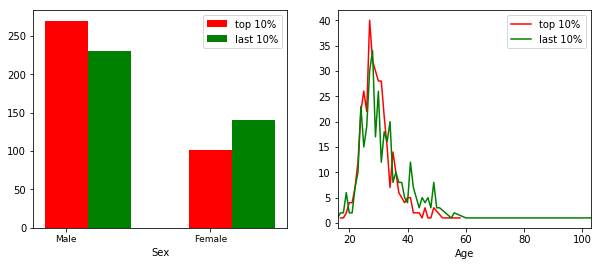

In [20]:
fig=plt.figure(figsize=(10,4),facecolor='white') 

low['sex']=low['sex'].replace('男','Male')
low['sex']=low['sex'].replace('女','Female')
high['sex']=high['sex'].replace('男','Male')
high['sex']=high['sex'].replace('女','Female')

ax=fig.add_subplot(1,2,1)
x=range(0,2)
x1=[i+0.3 for i in x]
plt.bar(x,low['sex'].value_counts(),width = .3,label='top 10%',color='red')
plt.bar(x1,high['sex'].value_counts(),width = .3,label='last 10%',color='green')
plt.xticks(x,['Male','Female'],rotation=0,fontsize=9)
plt.xlabel('Sex')
plt.legend()

ax=fig.add_subplot(1,2,2)
counts2=high['age'].value_counts()
counts2=counts2.sort_index()
plt.xlabel('Age')
counts2.plot(color='red',label='top 10%')
counts1=low['age'].value_counts()
counts1=counts1.sort_index()
plt.xlabel('Age')
counts1.plot(color='green',label='last 10%')
plt.legend()
plt.show()

In [57]:
low['sex'].value_counts()

0    270
1    101
Name: sex, dtype: int64

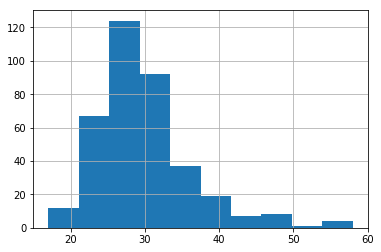

count    371.000000
mean      30.072776
std        6.279317
min       17.000000
25%       26.000000
50%       29.000000
75%       32.000000
max       58.000000
Name: age, dtype: float64

In [25]:
high['age'].hist()
plt.show()
high['age'].describe()

In [50]:
from scipy.stats import ttest_rel

In [53]:
t,p=ttest_rel(list(low['age'])[:371],list(high['age'])[:371])
print(t)  
print(p) 

4.19523654452
3.41593272754e-05


In [56]:
low['sex']=low['sex'].replace('Male',0)
low['sex']=low['sex'].replace('Female',1)
high['sex']=high['sex'].replace('Male',0)
high['sex']=high['sex'].replace('Female',1)
t,p=ttest_rel(list(low['sex'])[:371],list(high['sex'])[:371])
print(t)  
print(p) 

-3.14973770069
0.00176710120431


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [21]:
node=pd.read_csv('./node.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'],index_col=0)

In [22]:
node[node['user_id']==59159076][['app_name','app_type_name']].drop_duplicates()

,app_name,app_type_name
13372766,微信,社交沟通
14182591,QQ,社交沟通
33701972,今日头条,其他资讯
36753303,内涵段子,阅读
38061732,新浪微博,社交沟通
21441320,掌上百度,搜索
21593180,百度新闻,其他资讯
23140661,雅虎天气,生活服务
38632470,手机腾讯网,其他资讯
27800109,奇艺高清影视,视频


In [23]:
node[node['user_id']==46556643][['app_name','app_type_name']].drop_duplicates()

,app_name,app_type_name
16937128,豌豆荚,软件工具
29776737,搜狗输入法,软件工具
29787910,360安全卫士,软件工具
30393100,手机腾讯网,其他资讯
31837553,QVOD快播,视频
15535537,UC浏览器,网页浏览
16539404,掌上百度,搜索
20172028,iReader掌阅,阅读
25737333,起点读书,阅读
32469969,百度输入法,软件工具


In [24]:
node=node[['user_id','app_name','app_type_name']]

In [25]:
node=node.drop_duplicates()

In [26]:
for i in lower_class:  
    low=node[node['user_id']==i].index
    node.ix[low,'category']='low'

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
for i in upper_class:  
    high=node[node['user_id']==i].index
    node.ix[high,'category']='high'

In [28]:
high=node[node['category']=='high']['app_type_name'].value_counts()

In [29]:
attention=pd.DataFrame([high.index,high.values]).T

In [30]:
attention.columns=['app_type_name','high_number']

In [31]:
low=node[node['category']=='low']['app_type_name'].value_counts()

In [32]:
diction=dict(zip(low.index,low.values))

In [33]:
attention['low_number']=attention['app_type_name'].apply(lambda x: diction[x])

In [34]:
attention['app_type_name'].values

array(['社交沟通', '视频', '其他资讯', '音乐', '电商购物', '位置', '网页浏览', '生活服务', '社区论坛',
       '软件工具', '搜索', '应用商店', '游戏', '支付', '阅读', '旅游', '邮箱', '房产', '招聘'], dtype=object)

In [35]:
attention['app_type_name']=attention['app_type_name'].replace(['社交沟通', '视频', '其他资讯', '音乐', '电商购物', '位置', '网页浏览', '生活服务', '社区论坛','软件工具', '搜索', '应用商店', '游戏', '支付', '阅读', '旅游', '邮箱', '房产', '招聘'],\
                                                              ['Communication','Video','News','Music','Shopping','Navigation','Webpage browsing','Service','Forum','Software Tool','Search','App Store','Game','Payment','Reading','Travel','Email','Real Estate','Recruitment'])

In [36]:
attention=attention[attention['app_type_name']!='App Store']

In [37]:
attention

,app_type_name,high_number,low_number
0,Communication,1227,1014
1,Video,854,748
2,News,662,599
3,Music,487,261
4,Shopping,470,319
5,Navigation,414,512
6,Webpage browsing,384,284
7,Service,332,206
8,Forum,306,330
9,Software Tool,297,730


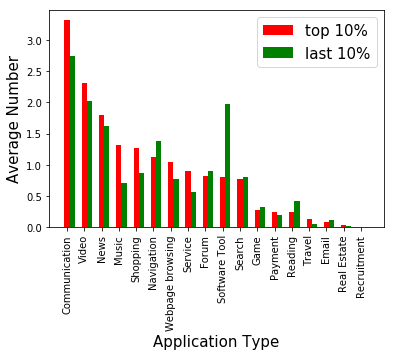

In [38]:
x=range(0,len(attention))
x1=[i+0.3 for i in x]
plt.bar(x,attention['high_number'].values/370,width = .3,label='top 10%',color='red')
plt.bar(x1,attention['low_number'].values/370,width = .3,label='last 10%',color='green')
plt.legend(fontsize=15)
plt.xticks(rotation=90,fontsize=10)
plt.xticks(x,['Communication', 'Video', 'News', 'Music', 'Shopping', 'Navigation','Webpage browsing', 'Service', 'Forum','Software Tool','Search', 'Game', 'Payment', 'Reading', 'Travel', 'Email','Real Estate', 'Recruitment'])
plt.xlabel('Application Type',fontsize=15)
plt.ylabel('Average Number',fontsize=15)
plt.show()

In [51]:
node=pd.read_csv('./node.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'],index_col=0)

In [50]:
node=node[['user_id','longtitude','latitude']]

In [51]:
node=node.drop_duplicates()

In [52]:
for i in lower_class:  
    low=node[node['user_id']==i].index
    node.ix[low,'category']='low'

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
for i in upper_class:  
    high=node[node['user_id']==i].index
    node.ix[high,'category']='high'

In [57]:
data['location']=(data['latitude'].astype(str)+','+data['longtitude'].astype(str)).values

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
data=data[data['location'].astype('str')!='nan,nan']

In [59]:
data=data.to_csv('/Users/xuhuimin/Desktop/data.csv',header=None)

In [60]:
data1=node[node['category']=='high']
data1['location']=(data1['latitude'].astype(str)+','+data1['longtitude'].astype(str)).values
data1=data1[data1['location'].astype('str')!='nan,nan']

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
data1.to_csv('/Users/xuhuimin/Desktop/data1.csv',header=None)

In [63]:
data=pd.read_csv('/Users/xuhuimin/Desktop/data.csv',names=['user_id','node1','node2','category','location'])

In [64]:
data1=pd.read_csv('/Users/xuhuimin/Desktop/data1.csv',names=['user_id','node1','node2','category','location'])

In [65]:
low=data.groupby('user_id')['location'].count().values

In [66]:
high=data1.groupby('user_id')['location'].count().values

In [67]:
t,p=ttest_rel(list(low)[:443],list(high)[:443])
print(t)  
print(p) 

2.80753149421
0.00521319958328


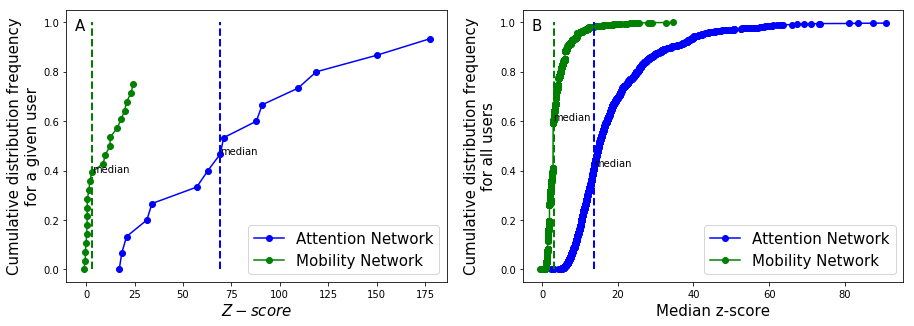

In [46]:
# for a given person
fig = plt.figure(figsize=(15, 5),facecolor='white')
ax=fig.add_subplot(1,2,1)
attention=pd.read_csv('./siteexample1/pair/61334712.csv')
mobility=pd.read_csv('./siteexample1/location/pair/61334712.csv')
attention=attention['z_score']

mobility=mobility['z_score']
x,px=powerlaw.cdf(attention)
a,pa=powerlaw.cdf(mobility)
plt.plot(x, px,'bo-',label='Attention Network')
plt.plot(a, pa,'go-',label='Mobility Network')
plt.legend(fontsize=15)
plt.xlabel('$Z-score$',fontsize=15)
plt.ylabel('Cumulative distribution frequency\nfor a given user',fontsize=15)
x0=np.median(x)
y0=np.median(px)
x1=np.median(a)
y1=np.median(pa)
plt.plot([x0,x0,x0], [0, y0,1], 'b--', linewidth=2.0)
plt.annotate('median', xy = (x0, y0), xytext = (x0, y0))
plt.plot([x1,x1,x1], [0, y1,1], 'g--', linewidth=2.0)
plt.annotate('median', xy = (x1, y1), xytext = (x1, y1))
ax.text(0.05, 0.97,'A',fontsize=15,horizontalalignment='right',verticalalignment='top',transform=ax.transAxes)

ax=fig.add_subplot(1,2,2)
attention=zscore_category['median']

mobility=zscore_category['loc_median']
x,px=powerlaw.cdf(attention)
a,pa=powerlaw.cdf(mobility)
plt.plot(x, px,'bo-',label='Attention Network')
plt.plot(a, pa,'go-',label='Mobility Network')
plt.legend(fontsize=15)
plt.xlabel('Median z-score',fontsize=15)
plt.ylabel('Cumulative distribution frequency\nfor all users',fontsize=15)
x0=np.median(x)
y0=np.median(px)
x1=np.median(a)
y1=np.median(pa)
plt.plot([x0,x0,x0], [0, y0,1], 'b--', linewidth=2.0)
plt.annotate('median', xy = (x0, y0), xytext = (x0, y0))
plt.plot([x1,x1,x1], [0, y1,1], 'g--', linewidth=2.0)
plt.annotate('median', xy = (x1, y1), xytext = (x1, y1))
ax.text(0.05, 0.97,'B',fontsize=15,horizontalalignment='right',verticalalignment='top',transform=ax.transAxes)
plt.show()


In [52]:
node=pd.read_csv('./siteexample1/node.csv',index_col=0,names=['user_id','app'])

In [14]:
node[node['user_id']==60345558]

,user_id,app
39122671,60345558,搜狗输入法
39509419,60345558,360安全卫士
39653577,60345558,微信
39889066,60345558,QQ
40540227,60345558,360手机助手
44953175,60345558,UC浏览器
32657022,60345558,墨迹天气
34467064,60345558,百度地图
40822848,60345558,手机腾讯网
7893736,60345558,谷歌地图


In [15]:
node[node['user_id']==46556643]

,user_id,app
16937128,46556643,豌豆荚
29776737,46556643,搜狗输入法
29787910,46556643,360安全卫士
30393100,46556643,手机腾讯网
31837553,46556643,QVOD快播
15535537,46556643,UC浏览器
16539404,46556643,掌上百度
20172028,46556643,iReader掌阅
25737333,46556643,起点读书
32469969,46556643,百度输入法


In [53]:
print(len(highest[highest.category11=='low_high']))
print(len(highest[highest.category11=='low_low']))
print(len(highest[highest.category11=='high_high']))
print(len(highest[highest.category11=='high_low']))

43
124
51
153


In [54]:
print(len(zscore_category[zscore_category.category11=='low_high']))
print(len(zscore_category[zscore_category.category11=='low_low']))
print(len(zscore_category[zscore_category.category11=='high_high']))
print(len(zscore_category[zscore_category.category11=='high_low']))

747
1107
764
1090


In [55]:
# *
apple=zscore_category[zscore_category['brand_chn']=='苹果']
print(len(apple[apple.category11=='low_high'])/len(apple))
print(len(apple[apple.category11=='low_low'])/len(apple))
print(len(apple[apple.category11=='high_high'])/len(apple))
print(len(apple[apple.category11=='high_low'])/len(apple))

0.09264705882352942
0.30367647058823527
0.18676470588235294
0.41691176470588237


In [56]:
# *
samsung=zscore_category[zscore_category['brand_chn']=='三星']
print(len(samsung[samsung.category11=='low_high'])/len(samsung))
print(len(samsung[samsung.category11=='low_low'])/len(samsung))
print(len(samsung[samsung.category11=='high_high'])/len(samsung))
print(len(samsung[samsung.category11=='high_low'])/len(samsung))

0.2649812734082397
0.3258426966292135
0.19382022471910113
0.2153558052434457


In [57]:
others=zscore_category[zscore_category['brand_chn']!='苹果']
print(len(others[others.category11=='low_high'])/len(others))
print(len(others[others.category11=='low_low'])/len(others))
print(len(others[others.category11=='high_high'])/len(others))
print(len(others[others.category11=='high_low'])/len(others))

0.2644804088586031
0.29557069846678025
0.217206132879046
0.2227427597955707


In [ ]:
# plot all the edges for pairs in the attention network

In [58]:
observed_value=pd.read_csv('./siteexample1/observed_value.csv',index_col=0)

In [59]:
observed_value

,pair,app_obs,app_exp7,app_exp6,app_exp4,app_exp5,app_exp1,app_exp0,app_exp2,app_exp3,app_exp8,app_exp9,z_score
0,QQ 掌上百度,3112,1381.0,1345.0,1343.0,1374.0,1289.0,1341.0,1316.0,1358.0,1370.0,1345.0,63.710446
1,QQLive 掌上百度,2604,1192.0,1175.0,1175.0,1166.0,1160.0,1178.0,1152.0,1171.0,1187.0,1178.0,120.128506
2,优酷视频 掌上百度,755,426.0,414.0,442.0,439.0,428.0,435.0,424.0,443.0,439.0,449.0,30.148795
3,QQ音乐 掌上百度,786,487.0,459.0,476.0,476.0,457.0,463.0,472.0,464.0,464.0,492.0,26.728636
4,微信 掌上百度,3001,1331.0,1302.0,1316.0,1319.0,1283.0,1281.0,1270.0,1278.0,1302.0,1287.0,84.126449
5,百度地图 掌上百度,2266,1043.0,985.0,1006.0,1044.0,991.0,1009.0,999.0,1018.0,990.0,1003.0,60.646376
6,熊猫桌面 掌上百度,93,67.0,71.0,68.0,73.0,58.0,70.0,55.0,68.0,59.0,70.0,4.352513
7,新浪微博 掌上百度,1783,906.0,912.0,908.0,910.0,875.0,853.0,912.0,877.0,890.0,883.0,43.959428
8,墨迹天气 掌上百度,465,303.0,275.0,269.0,270.0,263.0,277.0,291.0,263.0,274.0,287.0,14.597619
9,91黄历天气 掌上百度,111,68.0,67.0,60.0,70.0,72.0,70.0,69.0,64.0,69.0,77.0,9.367132


In [60]:
observed_value=observed_value[['pair','app_obs']]
observed_value['node1']=observed_value['pair'].apply(lambda x: x.split(' ')[0])
observed_value['node2']=observed_value['pair'].apply(lambda x: x.split(' ')[1])
observed_value=observed_value[['node1','node2','app_obs']]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
observed_value=observed_value[~observed_value.isin([np.nan, np.inf, -np.inf]).any(1)]

In [62]:
observed_value.to_csv('/Users/xuhuimin/Desktop/pair.csv',index=None)

In [122]:
observed_value

,node1,node2,app_obs
0,QQ,掌上百度,3112
1,QQLive,掌上百度,2604
2,优酷视频,掌上百度,755
3,QQ音乐,掌上百度,786
4,微信,掌上百度,3001
5,百度地图,掌上百度,2266
6,熊猫桌面,掌上百度,93
7,新浪微博,掌上百度,1783
8,墨迹天气,掌上百度,465
9,91黄历天气,掌上百度,111


In [63]:
observed_value=observed_value[~observed_value.isin([np.nan, np.inf, -np.inf]).any(1)]
observed_value['node1']=observed_value['node1'].map(lambda x: ''.join(lazy_pinyin(str(x))))
observed_value['node2']=observed_value['node2'].map(lambda x: ''.join(lazy_pinyin(str(x))))

In [67]:
observed_value['ID']=range(1,17875)

In [68]:
observed_value.columns=['source','target','weight','ID']

In [69]:
observed_value['Type']='undirected'

In [70]:
median=observed_value['weight'].median()

In [71]:
high=observed_value[observed_value['weight']>median].index
observed_value.ix[high,'category']='high'
low=observed_value[observed_value['weight']<=median].index
observed_value.ix[low,'category']='low'

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [72]:
observed_value.to_csv('/Users/xuhuimin/Desktop/edge.csv',index=None)

In [73]:
node=pd.read_csv('./node.csv',names=range(0,7))

In [74]:
node=node[[4,5]]

In [75]:
node[5]=node[5].replace(np.nan,'其他')

In [76]:
node[5]=node[5].replace('应用商店','其他')

In [77]:
node=node.drop_duplicates()

In [78]:
node.columns=['node','category']

In [79]:
node.to_csv('/Users/xuhuimin/Desktop/node.csv',index=None)

In [80]:
node_e=node[:50]

In [81]:
node_e.to_csv('/Users/xuhuimin/Desktop/node_e.csv',index=None)

In [84]:
gw=nx.Graph()
gw.add_weighted_edges_from(observed_value.values)
degree_score=nx.degree_centrality(gw)
df=pd.DataFrame(list(degree_score.items()))

ValueError: too many values to unpack (expected 3)

In [ ]:
# plot the closely connected edges for pair in the attention network

In [99]:
observed_value_above=observed_value[observed_value['z_score']>0]

gw_above=nx.Graph()
gw_above.add_weighted_edges_from(observed_value_above.values)
degree_score_above=nx.degree_centrality(gw_above)

df[2]=df[0].apply(lambda x: degree_score_above[x])

df.columns=['app','all','above']

df=df.sort_values(['above'],ascending=False)

df['below']=df['all']-df['above']

df=df.sort_values(['above'],ascending=False)[['app','above','below']]

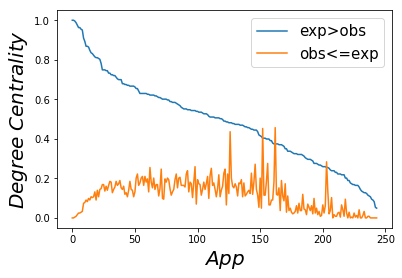

In [108]:
plt.plot(range(0,len(df['app'])),df['above'].values,label='exp>obs')
plt.plot(range(0,len(df['app'])),df['below'].values,label='obs<=exp')

plt.legend(fontsize=15)
plt.xlabel(r'$App$', fontsize = 20)
plt.ylabel(r'$Degree\;Centrality$', fontsize = 20)
plt.show()

In [ ]:
# mobility network

In [109]:
observed_value=pd.read_csv('./siteexample1/location/observed_value.csv',index_col=0)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [110]:
observed_value=observed_value[['pair','z_score']]
observed_value['node1']=observed_value['pair'].apply(lambda x: x.split(' ')[0])
observed_value['node2']=observed_value['pair'].apply(lambda x: x.split(' ')[1])
observed_value=observed_value[['node1','node2','z_score']]

In [111]:
gw=nx.Graph()
gw.add_weighted_edges_from(observed_value.values)
degree_score=nx.degree_centrality(gw)
df=pd.DataFrame(list(degree_score.items()))

In [112]:
observed_value_above=observed_value[observed_value['z_score']>0]

gw_above=nx.Graph()
gw_above.add_weighted_edges_from(observed_value_above.values)
degree_score_above=nx.degree_centrality(gw_above)

df[2]=df[0].apply(lambda x: degree_score_above[x])

df.columns=['app','all','above']

df=df.sort_values(['above'],ascending=False)

df['below']=df['all']-df['above']

df=df.sort_values(['above'],ascending=False)[['app','above','below']]

In [113]:
df

,app,above,below
1807,"116.333333,39.955371",0.428718,0.110639
886,"116.373529,39.986829",0.382661,0.075712
1268,"116.448101,39.988121",0.366186,0.064948
581,"116.536031,39.920071",0.351322,0.066925
1259,"116.446908,39.958055",0.342828,0.050231
82,"116.364841,39.999621",0.342535,0.059310
104,"116.456251,39.882651",0.330160,0.051329
1551,"116.457349,39.918696",0.330014,0.051402
2024,"116.381901,39.868501",0.327671,0.047741
2231,"116.33788,39.97342",0.326719,0.065681


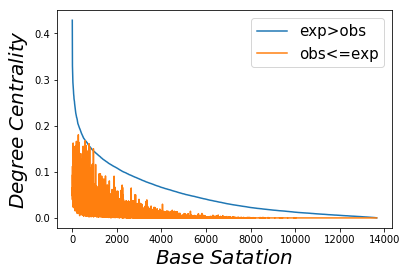

In [115]:
plt.plot(range(0,len(df['app'])),df['above'].values,label='exp>obs')
plt.plot(range(0,len(df['app'])),df['below'].values,label='obs<=exp')

plt.legend(fontsize=15)
plt.xlabel(r'$Base\;Satation$', fontsize = 20)
plt.ylabel(r'$Degree\;Centrality$', fontsize = 20)
plt.show()

In [3]:
observed_value=pd.read_csv('./siteexample1/observed_value.csv',index_col=0)

observed_value['node1']=observed_value['pair'].map(lambda x: x.split(' ')[0])
observed_value['node2']=observed_value['pair'].map(lambda x: x.split(' ')[1])

node=pd.read_csv('./siteexample1/node.csv',index_col=0,names=['node','app'])

diction=Counter(node['app'].values)

observed_value['count1']=observed_value['node1'].map(lambda x: diction[x])

observed_value['count2']=observed_value['node2'].map(lambda x: diction[x])

observed_value['count']=observed_value['count1']*observed_value['count2']

observed_value['mean']=observed_value.iloc[:,[x for x in range(2,12)]].mean(axis=1)

observed_value['std']=observed_value.iloc[:,[x for x in range(2,12)]].std(axis=1)

observed_value=observed_value[~observed_value.isin([np.inf, -np.inf]).any(1)]

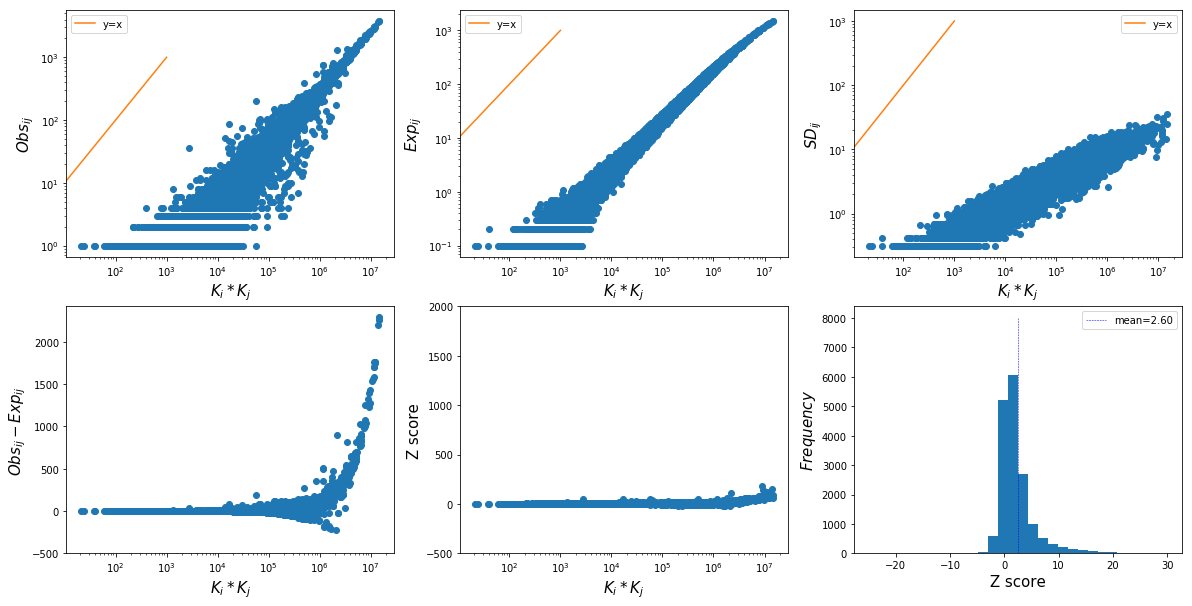

In [4]:
fig = plt.figure(figsize=(20, 10),facecolor='white')
ax=fig.add_subplot(2,3,1)
plt.plot(observed_value['count'].values,observed_value['app_obs'].values,'o')
x=[0,10**3]
y=[0,10**3]
plt.plot(x,y,label='y=x')
plt.legend()
plt.xlabel('$K_{i}*K_{j}$',fontsize=15)
plt.ylabel('$Obs_{ij}$',fontsize=15)
plt.xscale('log')
plt.yscale('log')

ax=fig.add_subplot(2,3,2)
plt.plot(observed_value['count'].values,observed_value['mean'].values,'o')
x=[0,10**3]
y=[0,10**3]
plt.plot(x,y,label='y=x')
plt.legend()
plt.xlabel('$K_{i}*K_{j}$',fontsize=15)
plt.ylabel('$Exp_{ij}$',fontsize=15)
plt.xscale('log')
plt.yscale('log')

ax=fig.add_subplot(2,3,3)
plt.plot(observed_value['count'].values,observed_value['std'].values,'o')
x=[0,10**3]
y=[0,10**3]
plt.plot(x,y,label='y=x')
plt.legend()
plt.xlabel('$K_{i}*K_{j}$',fontsize=15)
plt.ylabel('$SD_{ij}$',fontsize=15)
plt.xscale('log')
plt.yscale('log')

ax=fig.add_subplot(2,3,4)
plt.plot(observed_value['count'].values,(observed_value['app_obs']-observed_value['mean']).values,'o')
plt.yticks(range(-500,2500,500))
plt.xlabel('$K_{i}*K_{j}$',fontsize=15)
plt.ylabel('$Obs_{ij}-Exp_{ij}$',fontsize=15)
plt.xscale('log')

ax=fig.add_subplot(2,3,5)
plt.plot(observed_value['count'].values,((observed_value['app_obs']-observed_value['mean'])/observed_value['std']).values,'o')
plt.yticks(range(-500,2500,500))
plt.xlabel('$K_{i}*K_{j}$',fontsize=15)
plt.ylabel('Z score',fontsize=15)
plt.xscale('log')

ax=fig.add_subplot(2,3,6)
plt.hist(observed_value['z_score'].values,30,range=(-25,30))
plt.plot([2.60,2.60,2.60], [0,1700,8000], 'b--', linewidth=0.5,label='mean=2.60')
plt.legend()
plt.xlabel('Z score',fontsize=15)
plt.ylabel('$Frequency$',fontsize=15)

plt.plot()
plt.show()

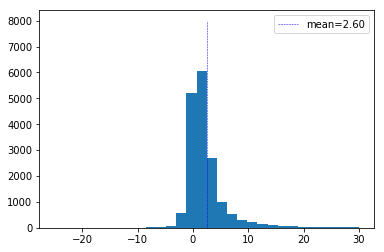

In [171]:
plt.hist(observed_value['z_score'].values,30,range=(-25,30))
plt.plot([2.60,2.60,2.60], [0,1700,8000], 'b--', linewidth=0.5,label='mean=2.60')
plt.legend()
plt.show()

In [100]:
observed_value['z_score'].values.mean()

2.6005592218584135

In [174]:
observed_value=pd.read_csv('./siteexample1/location/observed_value.csv',index_col=0)

observed_value['node1']=observed_value['pair'].map(lambda x: x.split(' ')[0])
observed_value['node2']=observed_value['pair'].map(lambda x: x.split(' ')[1])

node=pd.read_csv('./siteexample1/location/node.csv',index_col=0,names=['node','app'])

diction=Counter(node['app'].values)

observed_value['count1']=observed_value['node1'].map(lambda x: diction[x])

observed_value['count2']=observed_value['node2'].map(lambda x: diction[x])

observed_value['count']=observed_value['count1']*observed_value['count2']

observed_value['mean']=observed_value.iloc[:,[x for x in range(2,12)]].mean(axis=1)

observed_value['std']=observed_value.iloc[:,[x for x in range(2,12)]].std(axis=1)

observed_value=observed_value[~observed_value.isin([np.inf, -np.inf]).any(1)]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


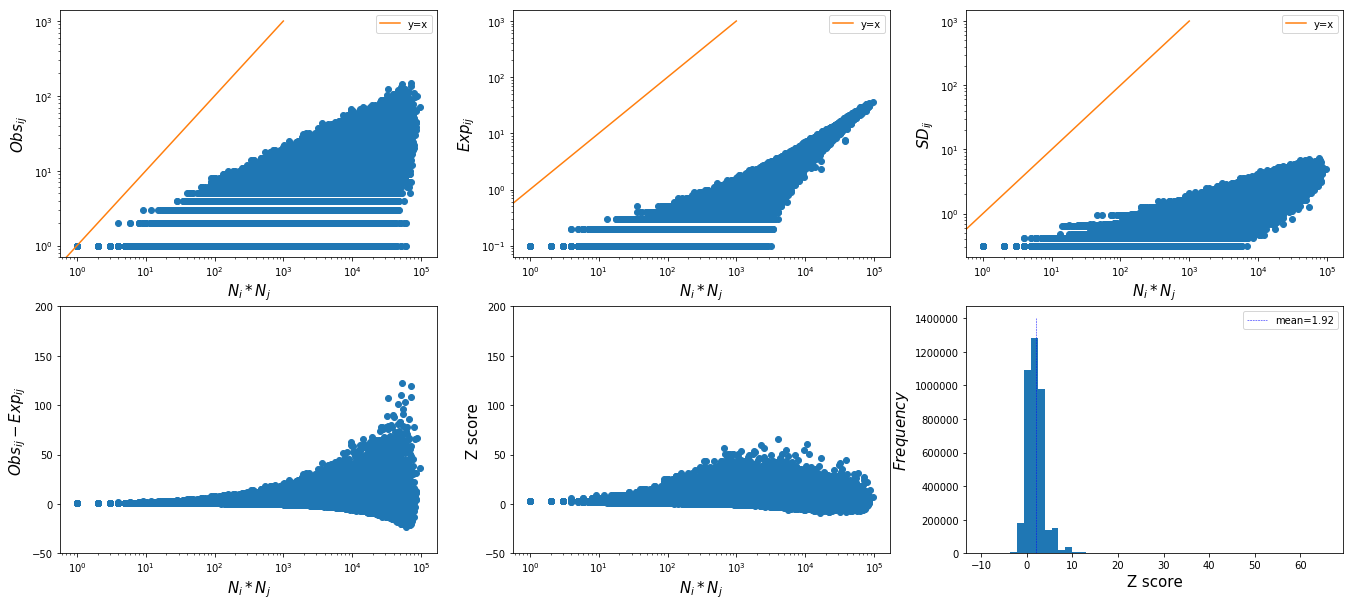

In [158]:
fig = plt.figure(figsize=(23, 10),facecolor='white')
ax=fig.add_subplot(2,3,1)
plt.plot(observed_value['count'].values,observed_value['app_obs'].values,'o')
x=[0,10**3]
y=[0,10**3]
plt.plot(x,y,label='y=x')
plt.legend()
plt.xlabel('$N_{i}*N_{j}$',fontsize=15)
plt.ylabel('$Obs_{ij}$',fontsize=15)
plt.xscale('log')
plt.yscale('log')

ax=fig.add_subplot(2,3,2)
plt.plot(observed_value['count'].values,observed_value['mean'].values,'o')
x=[0,10**3]
y=[0,10**3]
plt.plot(x,y,label='y=x')
plt.legend()
plt.xlabel('$N_{i}*N_{j}$',fontsize=15)
plt.ylabel('$Exp_{ij}$',fontsize=15)
plt.xscale('log')
plt.yscale('log')

ax=fig.add_subplot(2,3,3)
plt.plot(observed_value['count'].values,observed_value['std'].values,'o')
x=[0,10**3]
y=[0,10**3]
plt.plot(x,y,label='y=x')
plt.legend()
plt.xlabel('$N_{i}*N_{j}$',fontsize=15)
plt.ylabel('$SD_{ij}$',fontsize=15)
plt.xscale('log')
plt.yscale('log')

ax=fig.add_subplot(2,3,4)
plt.plot(observed_value['count'].values,(observed_value['app_obs']-observed_value['mean']).values,'o')
plt.yticks(range(-50,250,50))
plt.xlabel('$N_{i}*N_{j}$',fontsize=15)
plt.ylabel('$Obs_{ij}-Exp_{ij}$',fontsize=15)
plt.xscale('log')

ax=fig.add_subplot(2,3,5)
plt.plot(observed_value['count'].values,((observed_value['app_obs']-observed_value['mean'])/observed_value['std']).values,'o')
plt.yticks(range(-50,250,50))
plt.xlabel('$N_{i}*N_{j}$',fontsize=15)
plt.ylabel('Z score',fontsize=15)
plt.xscale('log')

ax=fig.add_subplot(2,3,6)
plt.hist(observed_value['z_score'].values,50)
plt.plot([1.92,1.92,1.92], [0,1700,1400000], 'b--', linewidth=0.5,label='mean=1.92')
plt.legend()
plt.xlabel('Z score',fontsize=15)
plt.ylabel('$Frequency$',fontsize=15)

plt.plot()
plt.show()

In [135]:
observed_value=observed_value[observed_value['z_score'].astype(str)!='nan']

In [139]:
observed_value['z_score'].values.mean()

1.9194304744525117

In [175]:
plt.hist(observed_value['z_score'].values,100,range(-10,50))
plt.plot([1.92,1.92,1.92], [0,1700,1400000], 'b--', linewidth=0.5,label='mean=1.92')
plt.legend()
plt.show()

ValueError: too many values to unpack (expected 2)

In [151]:
min(observed_value['z_score'])

-9.6223591659409244

In [154]:
ax=fig.add_subplot(2,3,5)
plt.plot(observed_value['count'].values,((observed_value['app_obs']-observed_value['mean'])/observed_value['std']).values,'o')
plt.yticks(range(int(min(observed_value['z_score'])),int(max(observed_value['z_score'])),20))
plt.xlabel('$N_{i}*N_{j}$',fontsize=15)
plt.ylabel('Z score',fontsize=15)
plt.xscale('log')

In [101]:
network=pd.read_csv('/Users/xuhuimin/Desktop/network.csv',index_col=0)

In [102]:
network=network[~network.isin([np.nan, np.inf, -np.inf]).any(1)]

In [103]:
network

,node1,node2,z_score
0,QQ,掌上百度,63.710446
1,QQLive,掌上百度,120.128506
2,优酷视频,掌上百度,30.148795
3,QQ音乐,掌上百度,26.728636
4,微信,掌上百度,84.126449
5,百度地图,掌上百度,60.646376
6,熊猫桌面,掌上百度,4.352513
7,新浪微博,掌上百度,43.959428
8,墨迹天气,掌上百度,14.597619
9,91黄历天气,掌上百度,9.367132
